# Machine Learning - Practical 2 - Introduction to Pytorch and Linear Regression with Pytorch

Names: {YOUR NAMES}  
Summer Term 2024   

# IMPORTANT SUBMISSION INSTRUCTIONS

You should work on the exercises in groups of 2-3. It is on you how you collaborate, but please make sure that everyone contributes equally and also that you understand all the solutions.
You will be asked to present your group's solution in the tutorials and you should be well prepared to present any part of it.

- When you've completed the exercise, download the notebook and rename it to ```<surname1>_<surname2>_<surname3>.ipynb```.
- Only submit the Jupyter Notebook (ipynb file). No other file is required. Upload it on `Stud.IP` -> `Machine learning 1` -> `Files` -> `Submission of Homework 1`.
- Make only one submission of the exercise per group.
- The deadline is strict.
- In addition to the submissions, every member of your group should be prepared to present the exercise in the tutorials.

Implementation
- Do not change the cells which are marked as "DO NOT CHANGE", similarly write your solution to the marked cells.

## How to work on the exercise?

Generally, for machine learning you often need access to a machine with a GPU. This is not strictly required for this homework but we recommend using [Kaggle](https://www.kaggle.com/), which offers convenient access to a GPU and has all the dependencies that we need preinstalled ([here](https://gist.github.com/anwai98/444d3ff11c1365f2c610579d5df0830b) are some initial steps to work with Kaggle Notebooks). You can load this notebook on kaggle via `File` -> `Import Noteboook` -> `Browse and  Import`. Alternatively, you can also use [Colab](https://colab.research.google.com).

# Introduction

In this task you will get to know the basic tools used by the machine learning community.
Later, we will build a linear regression model with PyTorch and perform training and prediction the linear regression problem from the previous practical. The goal of this tutorial is to understand the PyTorch framework and getting to know to use it. 

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:

*   [PyTorch Tutorial](https://pytorch.org/tutorials/)
*   [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) (data visualization library on top of matplotlib)


In [78]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import pathlib
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import sampler

In [79]:
torch.set_default_dtype(torch.float64)

## System checks

Perform some rudimentary system checks. Do we have a CUDA-capable device? Multiple? Is CuDNN active (huge speedups for some networks)?

In [80]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count()

(True, True, 2)

If you see now that now that there is no CUDA-capable device available, you have to activate the GPU.

Click the top-right corner menu `|<` -> `Settings` -> `Accelerator` -> Select `GPU` as Hardware accelerator.

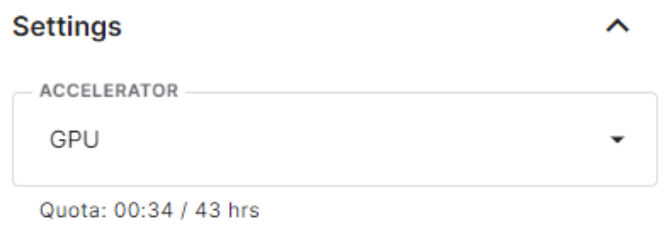

Now check the availability again (after re-running the imports)

In [81]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count(), torch.cuda.current_device()

(True, True, 2, 0)

Choose your device for computation. CPU or one of your CUDA devices?

In [82]:
# DO NOT CHANGE
use_cuda = True
# use_cuda = False
# use_cuda = False if not use_cuda else torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')
torch.cuda.get_device_name(device) if use_cuda else 'cpu'
print('Using device', device)

Using device cuda:0


# PyTorch: Getting to know Tensors

*feel free to skip this before 'Machine Learning with Pytorch' section if you feel confident enough*   
PyTorch is a library for machine learning on arbitrary datasets, including irregular input data such as graphs, point clouds and manifolds.

In this short tutorial we will explore some of its features to handle data in tensors.
If you want, you can look into more [detailed PyTorch tutorials](https://pytorch.org/tutorials/) online.

In [83]:
# create a numpy array
numpyarray = np.arange(10).reshape(2, 5)
# convert to pytorch tensor
a = torch.from_numpy(numpyarray)
print(numpyarray)

[[0 1 2 3 4]
 [5 6 7 8 9]]


Let us find out what the properties of this tensor 'a' are.

In [84]:
# TODO print the tensor
print(a)


tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [85]:
# TODO print its type
print(type(a))

<class 'torch.Tensor'>


In [86]:
# TODO print its shape
print(a.shape)


torch.Size([2, 5])


In [87]:
# TODO print its size
print(a.size())


torch.Size([2, 5])


In [88]:
# TODO create a new numpy array out of the tensor and print its size
numpy_array = a.numpy()
print(numpy_array.size)

10


Let's create some new tensors.

In [89]:
# TODO create a tensor of shape (2,5) filled with ones of type int and print it
tensor_ones = torch.ones((2,5), dtype = torch.int)
print(tensor_ones)


tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int32)


In [90]:
# TODO create a tensor of shape (3,4) filled with zeros and print it
tensor_zeros = torch.zeros(3,4)
print(tensor_zeros)


tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [91]:
# TODO transpose the tensor 'a'
transposed_a = a.T
transposed_a

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

Now change a value in the numpy array. Does the corresponding tensor change?

In [92]:
# TODO change value in numpy array and inspect the tensor a
numpyarray[0, 0] =1
print(a)

tensor([[1, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


**TODO Your answer here** 

Does it work the other way round as well?

**TODO Your answer here** 

In [93]:
a[0,0] = 2
numpyarray

array([[2, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

So. From the above exaple we can see that changes in the value of tensor also changes the value in the numpy array. 

Now we want to make use of the different devices available, namely cpu and gpu.

In [94]:
# TODO move 'a' to the gpu
a_gpu = a.cuda()
device

device(type='cuda', index=0)

If you change a value in the tensor 'a' now, does the corresponding value in the tensor on the GPU change as well?

**TODO Your answer here** 

In [95]:
a[0,0] = 7
a_gpu

tensor([[2, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]], device='cuda:0')

So, from this example, we can see that changes in the value in the tensor does not change the corresponding value in the tensor in GPU. The tensor on the GPU is a separate copy.

# Machine Learning with Pytorch

The process of training and evaluating a machine learning model begins with **data loading**.
A dataset needs to be chosen on which the model should be trained.
This data might need some preprocessing (like resizing or normalizing) of images. As Pytorch does not have in-build preprocessing for data panels we have to define our custom normalization inside a Dataset or Dataloader.
Splitting of the data in different sets is necessary. We need a set to train on, a set to validate the training progress and a set to test the model after training.

The next step is to **specify the model and its optimizer**, as well as the loss function.
An important hyperparameter is the learning rate which influences how big the changes of the parameters should be after calculating the loss.

The **model fitting** is split into training and evaluation.
In the training process the model does a forward pass which means the data is presented to the model and the model outputs a prediction.
The loss compares the prediction with the ground truth.
In the backward pass the gradient with regard to the parameter is calculated and the parameter are updated by the gradient step.
In the evaluation process the loss is computed on the entire validation set.
This is done to see how well the model operates on data for which the params were not optimized before in order to avoid overfitting.
The model fitting process is repeated for `N` epochs which is another hyperparameter that needs to be chosen carefully.

After the training we evaluate the final model on the test set.

We'll go through the individual steps in the course of this notebook using linear regression as an example.


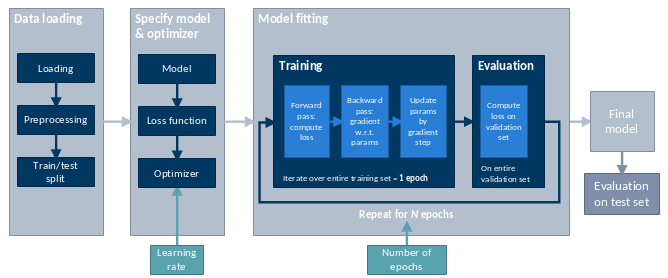

## Data Loading and Preprocessing

### Training, Validation and Test Sets

For the correct fitting of a neural network model we need three dataset components: one for training, one for validation in the training process, and the last one for testing the results of the training on unseen data.

Note that you should not use the test set in any part of your training and model selection procedure. It should be only used for showing the final results.  

Usually, train and test datasets are already split in the provided kaggle datasets but as we work with a custom dataset, we would have to make train-test split ourselves first.

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
test_size = 0.2
target_clm='critical_temp'

In [98]:
# TODO: load data - same as in the previous practical and make train_test_split from sklearn
df = pd.read_csv('/kaggle/input/superconductivity-trainig-file/superconduct_train.csv')
train, test = train_test_split(df, test_size = test_size, random_state = 42) 
train


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
16546,2,77.143500,53.722300,71.372307,51.848347,0.619298,0.497747,58.553000,32.438300,29.276500,...,4.000000,4.000000,4.000000,0.693147,0.325083,0,3.200000,0.000000,0.000000,5.00
5970,4,104.365600,71.922350,72.746865,43.369558,1.129463,1.221243,184.590600,26.332050,70.392496,...,2.000000,2.000000,2.000000,1.386294,1.207974,0,0.800000,0.000000,0.000000,97.00
7542,5,74.231650,51.256952,60.515221,34.941384,1.453747,1.327852,121.327600,20.724892,39.445875,...,2.076923,2.168944,2.063362,1.594167,1.229147,1,1.064615,0.400000,0.266469,62.10
2157,7,88.309607,48.586910,69.138309,33.542945,1.740703,1.724444,191.200600,11.938538,57.329551,...,2.138462,2.479397,2.104979,1.908037,1.479833,2,1.030769,0.728431,0.451559,60.00
18265,5,69.321369,72.150027,56.104529,55.643005,1.434383,1.302362,124.908250,31.227062,40.715396,...,3.575000,3.437544,3.381939,1.567056,1.488545,3,0.950000,1.019804,1.115516,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2,25.643269,25.348850,25.608325,25.315724,0.691785,0.678668,2.676539,4.303250,1.338269,...,2.390000,2.449490,2.342640,0.673012,0.692928,1,0.050000,0.500000,0.487750,1.50
11964,4,144.041845,128.014563,135.218871,120.611379,1.325694,1.318069,102.177620,32.495603,49.630753,...,5.833333,5.732657,5.820421,1.383370,1.224634,1,2.166667,0.433013,0.372678,5.82
5390,5,95.509280,56.977188,73.307186,36.853454,1.419515,1.484104,157.054600,14.484329,55.077433,...,2.078431,2.168944,2.064624,1.594167,1.287474,1,0.996078,0.400000,0.268849,60.00
860,4,92.505350,60.961000,68.030395,36.899835,1.172035,0.995372,134.360600,36.735514,55.465617,...,2.307143,2.632148,2.259535,1.342113,1.096043,2,1.057143,0.829156,0.505632,15.00


### Dataset

PyTorch has 2 entities to load data. They are **Dataset** and **Dataloader**.
**Dataset** is a class, which defines your data and often applies data preprocessing transformations, like normalization. It should have at least 3 functions :
* __init__ - as any other init. Usually, you would provide path to dataset here or dataset elements.
* __len__ - should return the whole dataset size
* __getitem__ - this function returns 1 pair of data and label, also here preprocessing transformations are usually applied



For the next exercise, take a look here for an example https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

In [99]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, df, target_clm, mean=None, std=None, normalise=True):
        '''
        TODO: save params to self attributes,
        x is data without target column
        y is target column
        transform df to_numpy
        '''
        self.x = df.drop(columns = [target_clm]).to_numpy()
        self.y = df[target_clm].to_numpy()
        self.mean = mean
        self.std = std
        self.normalise = normalise

    def __len__(self):
        # TODO: return whole dataset length
        '''
        Return the length of the training dataset.
        '''
        return len(self.x)
        

    def __getitem__(self, index):
        '''
        Get the single item from the datset at tthe specified index.  
        
        Parameters:
        -index - Index of the item to retrieve
        
        Returns:
        -Tuple containing the data and its corresponding label. 
        '''
        
        data = self.x[index]
        if self.normalise and self.mean is not None and self.std is not None:
            data = (data - self.mean) / self.std #Normalization
#         target = torch.tensor(self.y[index], dtype = torch.float32)
        return data,self.y[index] #returning tuple of data anc its label. 

In [100]:
#Here normalise is false because it is the instance of the previously defined class where the default value is true. 
tmp_dataset = Dataset(train, target_clm, normalise=False)
tmp_dataset[0]

(array([2.00000000e+00, 7.71435000e+01, 5.37223000e+01, 7.13723065e+01,
        5.18483469e+01, 6.19297743e-01, 4.97747067e-01, 5.85530000e+01,
        3.24383000e+01, 2.92765000e+01, 1.75659000e+01, 7.30650000e+02,
        6.72370000e+02, 7.27009147e+02, 6.71093559e+02, 6.88168295e-01,
        3.65932893e-01, 1.45700000e+02, 5.11670000e+02, 7.28500000e+01,
        4.37100000e+01, 1.72500000e+02, 1.75300000e+02, 1.72464489e+02,
        1.75287147e+02, 6.92941327e-01, 3.17113970e-01, 7.00000000e+00,
        1.41500000e+02, 3.50000000e+00, 2.10000000e+00, 8.26500000e+03,
        5.25860000e+03, 7.36122687e+03, 4.97164473e+03, 5.85882481e-01,
        5.37621726e-01, 7.51600000e+03, 2.85400000e+03, 3.75800000e+03,
        2.25480000e+03, 3.21500000e+01, 1.37100000e+01, 2.24124965e+01,
        1.08976075e+01, 4.07720562e-01, 6.74061992e-01, 4.61000000e+01,
        2.67000000e+00, 2.30500000e+01, 1.38300000e+01, 1.77000000e+01,
        1.85000000e+01, 1.76717288e+01, 1.84896671e+01, 6.915503

In [101]:
# TODO calculate the mean and standard deviation of the train dataset
train_columns = train.drop(columns = [target_clm])
train_columns

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
16546,2,77.143500,53.722300,71.372307,51.848347,0.619298,0.497747,58.553000,32.438300,29.276500,...,4.000000,4.000000,4.000000,4.000000,0.693147,0.325083,0,3.200000,0.000000,0.000000
5970,4,104.365600,71.922350,72.746865,43.369558,1.129463,1.221243,184.590600,26.332050,70.392496,...,2.000000,2.000000,2.000000,2.000000,1.386294,1.207974,0,0.800000,0.000000,0.000000
7542,5,74.231650,51.256952,60.515221,34.941384,1.453747,1.327852,121.327600,20.724892,39.445875,...,2.200000,2.076923,2.168944,2.063362,1.594167,1.229147,1,1.064615,0.400000,0.266469
2157,7,88.309607,48.586910,69.138309,33.542945,1.740703,1.724444,191.200600,11.938538,57.329551,...,2.571429,2.138462,2.479397,2.104979,1.908037,1.479833,2,1.030769,0.728431,0.451559
18265,5,69.321369,72.150027,56.104529,55.643005,1.434383,1.302362,124.908250,31.227062,40.715396,...,3.600000,3.575000,3.437544,3.381939,1.567056,1.488545,3,0.950000,1.019804,1.115516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2,25.643269,25.348850,25.608325,25.315724,0.691785,0.678668,2.676539,4.303250,1.338269,...,2.500000,2.390000,2.449490,2.342640,0.673012,0.692928,1,0.050000,0.500000,0.487750
11964,4,144.041845,128.014563,135.218871,120.611379,1.325694,1.318069,102.177620,32.495603,49.630753,...,5.750000,5.833333,5.732657,5.820421,1.383370,1.224634,1,2.166667,0.433013,0.372678
5390,5,95.509280,56.977188,73.307186,36.853454,1.419515,1.484104,157.054600,14.484329,55.077433,...,2.200000,2.078431,2.168944,2.064624,1.594167,1.287474,1,0.996078,0.400000,0.268849
860,4,92.505350,60.961000,68.030395,36.899835,1.172035,0.995372,134.360600,36.735514,55.465617,...,2.750000,2.307143,2.632148,2.259535,1.342113,1.096043,2,1.057143,0.829156,0.505632


In [102]:
# TODO define new datasets with mean, std and normalise=True
mean_train = train.drop(columns = [target_clm]).mean(axis = 0).to_numpy()
std_train = train.drop(columns = [target_clm]).std(axis = 0).to_numpy()
mean_train

array([4.11757790e+00, 8.75523005e+01, 7.30142221e+01, 7.12302088e+01,
       5.85247603e+01, 1.16575787e+00, 1.06464388e+00, 1.15807500e+02,
       3.32682487e+01, 4.44694609e+01, 4.15298287e+01, 7.69788332e+02,
       8.70284583e+02, 7.37655264e+02, 8.32620868e+02, 1.29982324e+00,
       9.28495511e-01, 5.72425844e+02, 4.82717218e+02, 2.15689296e+02,
       2.24104234e+02, 1.57913092e+02, 1.34749939e+02, 1.44381559e+02,
       1.21024549e+02, 1.26839402e+00, 1.13226504e+00, 1.39381481e+02,
       5.13245274e+01, 5.16045745e+01, 5.23450162e+01, 6.10835219e+03,
       5.26715243e+03, 3.44899631e+03, 3.11110002e+03, 1.07269458e+00,
       8.57139890e-01, 8.67431503e+03, 2.90942025e+03, 3.42041426e+03,
       3.32393190e+03, 7.68351735e+01, 9.25936162e+01, 5.42601826e+01,
       7.22048922e+01, 1.07071156e+00, 7.71729564e-01, 1.20792337e+02,
       5.92340515e+01, 4.89519425e+01, 4.44916042e+01, 1.42455537e+01,
       1.37967946e+01, 1.01056386e+01, 1.00983917e+01, 1.09406172e+00,
      

In [103]:
# TODO define new datasets with mean, std and normalise=True
#Since we are using class, not calling fuctions, we have to give specific values to every parameters. 
conductor_train = Dataset(df = train, target_clm = target_clm, mean =mean_train, std = std_train, normalise = True)
conductor_test = Dataset(df = test, target_clm =  target_clm, mean = mean_train, std = std_train, normalise = True)

We need to **split** the train dataset in two sets, one for training and one for validation.
While the training set needs to be quite large, the validation set can be relatively small.
Take 10 % of the dataset as validation set.
Assign samples *randomly* to the training and validation set, using a fixed seed to ensure that train and test splits are same across different model runs.

In fact, the good practice is to fix a global random seed not only the generator seed for even better reproducibility with `torch.manual_seed(0)`.
Machine learning models often involve random initialization of weights, augmentations, dropout layers, and other stochastic processes. Without fixing the random seed, each run of the model may produce slightly different results, making it challenging to reproduce specific results or debug issues.

In [104]:
# TODO split the train dataset in conductor_train and conductor_val
conductor_train, conductor_val = train_test_split(conductor_train, test_size = 0.1, random_state = 42)
len(conductor_train)

15309

In [105]:
batch_size = 256

To load the data for model training, we need to define the **dataloaders**.
A dataloader represents a Python iterable over a dataset and draws mini batches with random samples.
**Dataloader** calls \_\_getitem__ function from the Dataset and forms the batches.


Use the batch size as specified above.
Make sure we get shuffled samples in batches.

In [106]:
# TODO create dataloader for training, validation and test
train_dataloader = DataLoader(conductor_train, batch_size = batch_size, shuffle = True)
val_dataloader = DataLoader(conductor_val, batch_size = batch_size, shuffle = False)
test_dataloader = DataLoader(conductor_test, batch_size = batch_size, shuffle = False)
train_dataloader

Let's get a data point now to see what we're dealing with.

For this, you might want to check out how python's iterator protocol works. It's simple and will give you an important insight into python: https://wiki.python.org/moin/Iterator.

In [107]:
# TODO get an element of the train_dataloader
data_iter = iter(train_dataloader) #initializes an iterator
first_batch = next(data_iter) #next upacks the batch into features and targets.

features, targets = first_batch
features[0]

tensor([-0.7761, -0.4814, -0.3086, -0.2473, -0.1725, -0.4972, -0.0580, -0.7483,
        -0.6089, -0.5970, -0.3293, -0.7167, -0.9653, -0.4363, -0.8657, -0.5402,
         0.1953, -1.2974, -0.9497, -1.3225, -1.2440,  0.3688,  0.5227,  0.6931,
         0.6503, -0.5402, -0.0981, -0.5717, -1.0944, -0.4387, -0.4464,  0.1086,
         0.1636,  0.4364,  0.3216, -0.5726,  0.1150,  0.3528, -0.0285,  0.5576,
         0.6871,  0.5657,  0.4519,  0.8094,  0.7234, -0.3157,  0.1662, -0.2865,
         0.0736, -0.2059, -0.2496,  1.2027,  1.4183,  1.2990,  1.4503, -0.4427,
        -0.5260,  0.8780,  1.2986,  0.9448,  1.2406,  0.4158,  0.9280,  1.2749,
         1.7642,  0.4226,  0.7197, -0.7452,  0.2253, -0.6050, -0.6775,  1.0888,
         1.0482,  1.0575,  1.0314, -0.6070, -0.1543,  0.7709, -0.0827,  0.8392,
         0.9586])

In [108]:
# TODO print the dimensions of for elements from the previous step
print("Dimensions of features:", features.size())
print("Dimensions of targets:", targets.size())

Dimensions of features: torch.Size([256, 81])
Dimensions of targets: torch.Size([256])


x has size (\[batchsize\], 81) --> 256 elements/batches (or whatever you have defined in your data loader), 81 feature values.

y has size (\[batchsize\], 1) --> 256 elements/batches (again depends on your data loader config). There's one target value for each set of the features.

## Specify Model & Optimizer

### Specify a Model

The task is now to define a model to train on the data. In this simple example, we only need **one fully-connected layer** as defined in *torch.nn.Linear* that produces a predicted label for a specific training input row.

Before, we set some variables:
- the input and output size of the linear layer
- how long we want to train the model (number of epochs) and
- the learning rate.


In [109]:
epochs = 15
input_dim = 81
output_dim = 1
lr = 0.001

In [110]:
class LinearRegression(torch.nn.Module):
    """
    Linear regression model inherits the torch.nn.Module
    which is the base class for all neural network modules.
    """
    def __init__(self, input_dim, output_dim):
        """ Initializes internal Module state. """
        super(LinearRegression, self).__init__()
        # TODO define linear layer for the model
        self.linear = torch.nn.Linear(input_dim, output_dim)


    def forward(self, x):
        """ Defines the computation performed at every call. """
        # What are the dimensions of your input layer?
        # TODO flatten the input to a suitable size for the initial layer
        x = x.reshape(-1, 81)
        # TODO run the data through the layer
        outputs = self.linear(x)
        return outputs

### Instantiate the Model

Let us instantiate the model and take a look at the inside. It is always a good idea to verify that the actual architecture is what you intended it to be. Especially, when you start to create layers dynamically it is great for inspection/verification/debugging.

In [111]:
# TODO instantiate the model
model = LinearRegression(input_dim, output_dim)
model

LinearRegression(
  (linear): Linear(in_features=81, out_features=1, bias=True)
)

Feed the model to the GPU if available.

In [112]:
# TODO move model to device you specified above
model.to(device)


LinearRegression(
  (linear): Linear(in_features=81, out_features=1, bias=True)
)

Put the model in training mode.

In [113]:
# TODO put the model in train mode
model.train()

LinearRegression(
  (linear): Linear(in_features=81, out_features=1, bias=True)
)

### Define a Loss Function

Since we're dealing with regression problem, [MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) is the canonical choice for the loss.

In [114]:
# TODO define the loss function
loss_function = torch.nn.MSELoss()


## Model Fitting

### Train the Model

Everything is set for the model to train!

- In the forward pass, the prediction is made using the previously defined model on the elements of the dataloader.
- Then the loss (or error) needs to be computed by comparing the prediction to the actual label.
- In the backward pass, the model learns and updates its weights based on the current gradient.

### First, let's do all of the steps manually, without using the optimizer

**Hints:**
* define number of epochs to see the dynamic. You need to see the effect over several epochs but it should no be too long. 
* use learning rate defined above as `lr`
* when doing parameters update - do it under `with torch.no_grad():`. This would disable the gradient computation for the operations under it. And we don't need gradients for updating the weights step.
* you need to update the model parameters. See [here](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html) for more details on how to access them
* don't forget to track the learning (loss)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([205])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Total Loss:132923.93975794574
Epoch 1, Total Loss:118875.43159730405
Epoch 2, Total Loss:108357.88344150814
Epoch 3, Total Loss:100326.649432788
Epoch 4, Total Loss:93977.25622574412
Epoch 5, Total Loss:89094.06528821519
Epoch 6, Total Loss:85127.45241400726
Epoch 7, Total Loss:82155.04369147644
Epoch 8, Total Loss:79769.05270773108
Epoch 9, Total Loss:77755.43398426389
Epoch 10, Total Loss:76321.33488386718
Epoch 11, Total Loss:75148.63432995096
Epoch 12, Total Loss:74235.60060649448
Epoch 13, Total Loss:73505.09197342487
Epoch 14, Total Loss:72954.76529969391


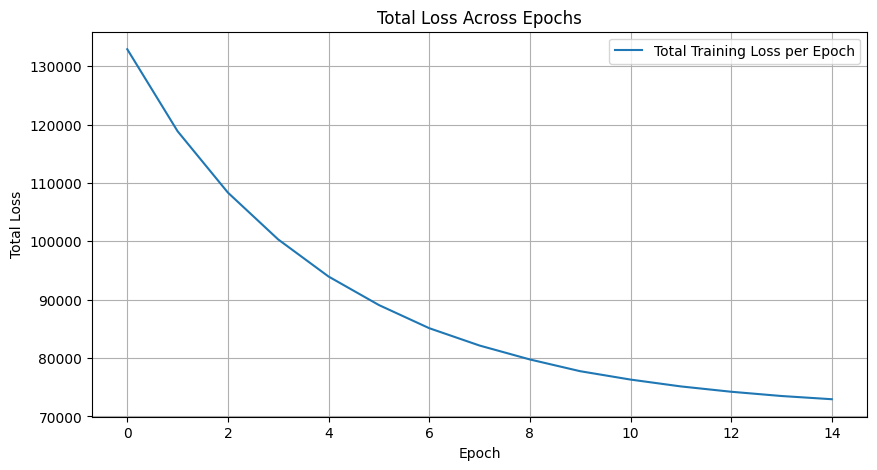

In [115]:
## TODO do a simple for-loop to illustrate how the gradient update if done over batches. 
epoch_losses = []
#Training loop
for epoch in range(epochs):
    total_loss_per_epoch = 0.0
    for featues, targets in train_dataloader:
        #Move the data to GPU
        features, targets = features.to('cuda'), targets.to('cuda') #eunsuring all inputs and targes are on GPU
        
        
        #forward pass
        outputs = model(features)
        loss = loss_function(outputs, targets)
        
        #Clear the previous gradients
        model.zero_grad()
         
        #Backward pass
        loss.backward()
        
        #Manual parameter update
        with torch.no_grad():
            for param in model.parameters():
                param -= (lr * param.grad)
                    
        #Accumulate loss
        total_loss_per_epoch += loss.item()
        
    #Append total loss of the epoch to the list
    epoch_losses.append(total_loss_per_epoch)

    # Print loss values across epochs to compare with the PyTorch optimizers later
    print(f'Epoch {epoch}, Total Loss:{total_loss_per_epoch}')
    
# After training, plot the loss across different epochs. 
plt.figure(figsize=(10, 5))
plt.plot(epoch_losses, label='Total Training Loss per Epoch')
plt.title('Total Loss Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.legend()
plt.grid(True)
plt.show()

Now, we can see that the total loss is decreasing as we increase the number of epochs. It suggests that our model is learning effectively and improving its perfromance on the training data. 

This was equivalent to SGD optimizer

### Now let's do it in the pytorch style using the optimizer  

The optimizer is the learning algorithm we use. In this case, we use Stochastic Gradient Descent (SGD).
Redefine the model and initialize SGD optimizer

Epoch 1, Loss: 102501.67896503517
Epoch 2, Loss: 80613.57142196942
Epoch 3, Loss: 68289.5403337511
Epoch 4, Loss: 59056.17678839143
Epoch 5, Loss: 51824.33296337847
Epoch 6, Loss: 46175.57471014258
Epoch 7, Loss: 41728.62833310576
Epoch 8, Loss: 38198.574546572214
Epoch 9, Loss: 35346.78598092667
Epoch 10, Loss: 33150.92152676764
Epoch 11, Loss: 31303.082989402326
Epoch 12, Loss: 29852.030606118984
Epoch 13, Loss: 28710.053424604535
Epoch 14, Loss: 27744.586106792172
Epoch 15, Loss: 26989.20060002309


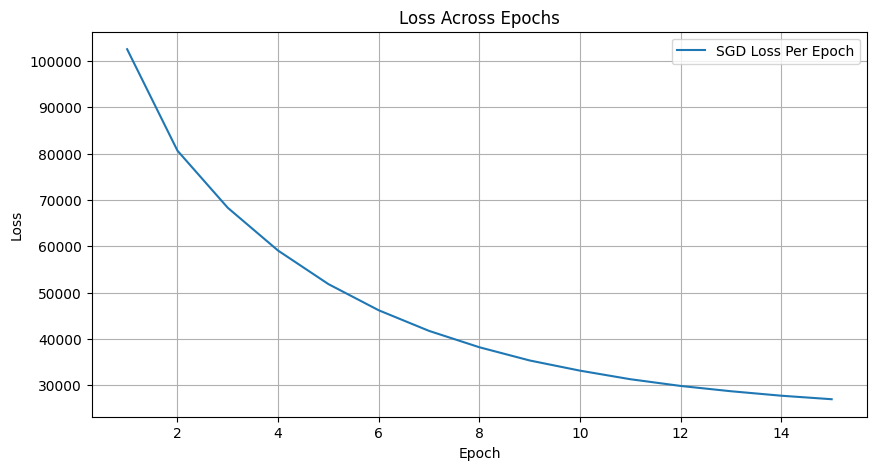

In [116]:
# TODO Redefine the model and initialize SGD optimizer, write a train loop as above and compare the loss values

import torch.optim as optim
import torch.nn as nn

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(81, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model
model = LinearRegression()

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

#Define the optimizer
optimizer = optim.SGD(model.parameters(), lr)

# To store loss values for plotting
epoch_losses_sgd = []

# Training loop
for epoch in range(epochs):
    epoch_loss = 0.0  # Initialize loss for the epoch
    for features, targets in train_dataloader:
        # Move data to GPU
        features, targets = features.to(device), targets.to(device)

        # Ensure targets are the correct shape
        targets = targets.view(-1, 1)

        # Forward pass
        outputs = model(features)
        loss = loss_function(outputs, targets)

        # Clear previous gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Update model parameters
        optimizer.step()

        # Accumulate loss for the epoch
        epoch_loss += loss.item()

    # Store epoch loss for plotting
    epoch_losses_sgd.append(epoch_loss)

    # Print loss to monitor progress
    print(f'Epoch {epoch+1}, Loss: {epoch_loss}')

# After training, plot the loss across each epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), epoch_losses_sgd, label='SGD Loss Per Epoch')
plt.title('Loss Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Make a Prediction

Now that our model is trained, we can make a new prediction by inputting an unseen data row from the test dataset.

Run this cell several times, does the model predict accurately?

Set the number of epochs to 15 during training and try again!

**TODO your answer here** -

In [117]:
#TODO get a random element fo the test dataloader
num_predictions = 10

for _ in range (num_predictions):
    random_element = random.choice(test_dataloader.dataset)
    features, target = random_element
    random_element_tensor = torch.tensor(features).to(device)
    
    #TODO make a prediction
    with torch.no_grad():
        model.eval() #Set the model to evaluation mode
        prediction = model(random_element_tensor)
    
    #print predicted label and given label
    print("Predicted label:", prediction.item())
    print("Given Label:", target)
    print()






Predicted label: 57.99738225030549
Given Label: 82.0

Predicted label: 35.60999715590926
Given Label: 16.2

Predicted label: -1.9875118159189498
Given Label: 1.87

Predicted label: 35.97951548672192
Given Label: 11.4

Predicted label: 14.474619999322712
Given Label: 36.2

Predicted label: 15.193372667975718
Given Label: 22.4

Predicted label: 55.91275911904701
Given Label: 81.4

Predicted label: -3.721733615050912
Given Label: 17.99

Predicted label: 29.28842088041905
Given Label: 21.3

Predicted label: 54.49576900593887
Given Label: 102.0



### Track and Plot the Training and Validation error

What we have seen so far is the basic principle of training a model and making a prediction. But one might be interesting to see more about the training process, for instance how the training error evolves with time.

For this step, we are going to **refine the training process** and **add some important information saving for plotting**.

Create a plot using **seaborn** that contains both the losses on training set and the losses on the validation set for each epoch.

The plot should look similar to this:


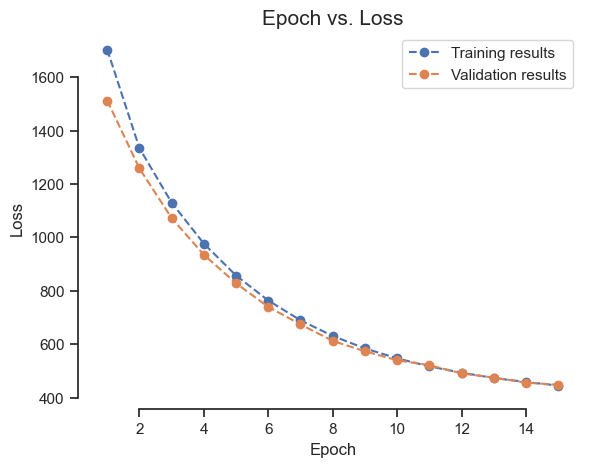


**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

In [118]:
# TODO refine the training function from above
# it should contain:
# - saving of losses
# - returning the mean loss
def train_model(model, train_dataloader, loss_function, optimizer, device):
    # Set model to training mode
    model.train()
    
    # Initialize list to store epoch losses
    train_loss = 0
    
    # Iterate over the training dataset
    for features, targets in train_dataloader:
        features, targets = features.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(features)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Calculate mean loss for the epoch
    mean_loss = train_loss / len(train_dataloader)
    
    return mean_loss



In [119]:
def validate_model(model, val_dataloader, loss_function, device):
    val_losses = 0
    
    # Validation phase
    model.eval()
    
    with torch.no_grad():
        for features, targets in val_dataloader:
            features, targets = features.to(device), targets.to(device)
            outputs = model(features)
            loss = loss_function(outputs, targets)
            val_losses += loss.item()
            
        # Calculating the mean validation loss
        mean_val_loss = val_losses / len(val_dataloader)
        
    return mean_val_loss


In [120]:
# TODO write a run_training function that
# - calls the train and validate functions for each epoch
# - saves the train_losses, val_losses as arrays for each epoch


def run_training(model, train_dataloader, val_dataloader, loss_function, optimizer, device, epochs):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        # Training phase
        model.train()  # Set the model to the training mode 
        epoch_train_losses = train_model(model, train_dataloader, loss_function, optimizer, device)
        train_losses.append(epoch_train_losses)
        
        # Validation phase
        model.eval()
        epoch_val_losses = validate_model(model, val_dataloader, loss_function, device)
        val_losses.append(epoch_val_losses)
        
    return train_losses, val_losses

In [121]:
#TODO call the run_training function and run it for 15 epochs.
model = LinearRegression()
model.to(device)
model.train()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
num_epochs = 15
train_losses, val_losses = run_training(model, train_dataloader, val_dataloader, loss_function, optimizer, device, epochs = num_epochs)
val_losses


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([205])) that is different to the input size (torch.Size([205, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([165])) that is different to the input size (torch.Size([165, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[2172.6459457355722,
 1971.1227127815387,
 1812.064703964843,
 1686.3302224935467,
 1587.4471433673318,
 1509.4338152867606,
 1447.7283284903283,
 1399.1152586160583,
 1360.7478001724635,
 1330.3004871969954,
 1306.2311038396563,
 1287.1326077731703,
 1272.187338050528,
 1260.2258008982215,
 1250.7793545129502]

In [122]:
# TODO write a plot function
def plot_losses(train_losses, val_losses):
    
    """
    Plot the traing and validation losses for each epoch.
    
    Args:
    - train_losses (list): List of training losses for each epoch
    - val_losses (list): List of validation losses for each epoch
    """
    epochs = range(1, len(train_losses) + 1)
    
    #create a DataFrame for the losses
    loss_data = pd.DataFrame({'Epoch': epochs, 'train_losses':train_losses, 'val_losses': val_losses})
    print(loss_data)
    
#     plt.set(style = "whitegrid")
    plt.figure(figsize=(10,6))
    sns.lineplot(x = 'Epoch', y = 'value', hue = 'variable', data = pd.melt(loss_data,['Epoch']))
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend(title = None)
    plt.show()

    Epoch  train_losses   val_losses
0       1   2226.663136  2172.645946
1       2   2001.584393  1971.122713
2       3   1826.758868  1812.064704
3       4   1686.271716  1686.330222
4       5   1575.878101  1587.447143
5       6   1491.135305  1509.433815
6       7   1422.138211  1447.728328
7       8   1369.532321  1399.115259
8       9   1328.001012  1360.747800
9      10   1295.668711  1330.300487
10     11   1269.982911  1306.231104
11     12   1249.356237  1287.132608
12     13   1232.024970  1272.187338
13     14   1220.235589  1260.225801
14     15   1210.476777  1250.779355


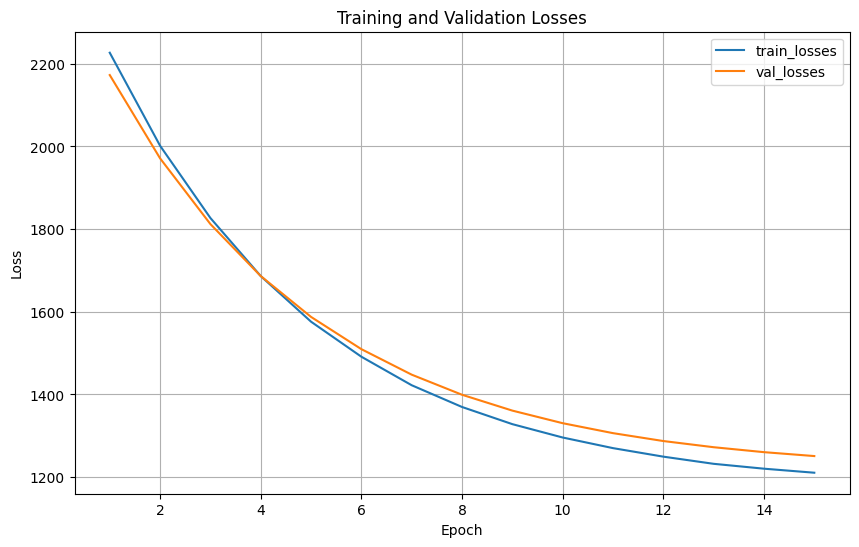

In [123]:
# TODO plot losses

#To remove the future warning. 
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
pd.set_option('mode.use_inf_as_na', True)

plot_losses(train_losses, val_losses)

Comment on the loss curve. Does it look as expected? Why/Why not?
If not, what might be the reason.

We can see that both the training and validation losses decreases as the model learns to capture patterns in the training data for higher epochs. However, after 4th epoc, it seems that the curve of validation losses begins to increase. Thus, the loss curve does not look as expected. For bigger epochs,the model starts to memorize noise in the training data causing the training loss to continue decreasing and validation loss begins to incrase. 

# Hyperparameters influence

Now, once we successfully reproduced linear regression using PyTorch, lets explore the hyperparameters influence, such as learning rate or batch size.

Train several models with 30 train epochs and using different learning rates - [0.0001, 0.001, 0.01, 0.1, 1, 10].
What do you notice? Why?

*Hints*: 
* Do not forget to reinitialize models and update the optimizers
* Use different colors and line styles to display different learning rates and train-validation splits

In [124]:
num_epochs = 30
lr = [0.0001, 0.001, 0.01, 0.1, 1, 10]
## TODO - train models with different learning rates

for i, learning_rate in enumerate(lr):
    model = LinearRegression()
    model.to(device)
    model.train()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    train_losses, val_losses = run_training(model, train_dataloader, val_dataloader, loss_function, optimizer, device, epochs = num_epochs)
    print(f'\n for learning rate {learning_rate}: training_losses = {train_losses}')
    print(f'\n for leaning rate {learning_rate}: validation_losses = {val_losses}')
    print('-' * 40)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([205])) that is different to the input size (torch.Size([205, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([165])) that is different to the input size (torch.Size([165, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(


 for learning rate 0.0001: training_losses = [2345.357197769862, 2317.668876257054, 2292.6878480192486, 2264.9117086234805, 2238.2319243057477, 2213.1526308908055, 2187.1664125609555, 2162.9484408650887, 2141.207202654254, 2117.4660103122137, 2095.4418901220715, 2072.9871488670487, 2052.645576223454, 2031.0283862560302, 2011.7388305203963, 1989.3165824328619, 1971.8838914969276, 1953.3735016010548, 1933.4001707092912, 1917.4008578213638, 1899.4473546022168, 1880.920539912708, 1864.391840632523, 1848.9211729142903, 1832.9507156618597, 1816.944721625506, 1801.029389934527, 1786.8246175191593, 1772.508089211558, 1758.3162186503278]

 for leaning rate 0.0001: validation_losses = [2402.2659618736056, 2374.568722730318, 2347.507227887055, 2321.0826261558946, 2295.3054744008796, 2270.1382979083173, 2245.521626857904, 2221.4963853275626, 2198.0176799322862, 2175.0894113520226, 2152.7033953411587, 2130.8279921970898, 2109.465633987686, 2088.5851166313305, 2068.2071446508753, 2048.317340202858,

From this output we can see that the when the learning rate is too high, it can lead to numerical instability during training. The gradients exploding or oscillations occurs in the loss function.Thus we get NaN (not a number) values.

Since we have NaN values for the bigger learning rates, we will plot different models only for the learning rate upt 0.01. Otherweise we won't be able to get any valid graph as there are not data for the loss.

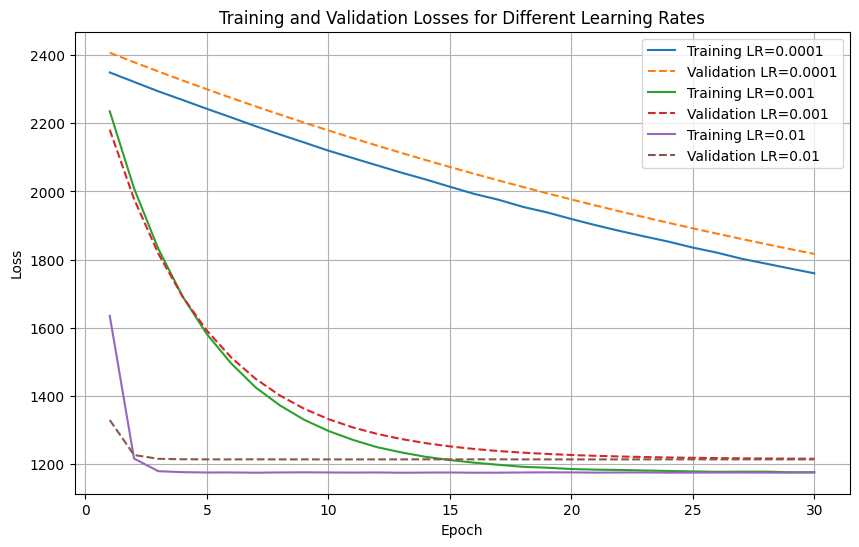

In [125]:
# Create a single figure
lr = [0.0001, 0.001, 0.01]
num_epochs = 30
plt.figure(figsize=(10, 6))

# Plot losses for each learning rate
for learning_rate in lr:
    model = LinearRegression()
    model.to(device)
    model.train()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    train_losses, val_losses = run_training(model, train_dataloader, val_dataloader, loss_function, optimizer, device, epochs=num_epochs)
    plt.plot(range(1, num_epochs + 1), train_losses, label=f'Training LR={learning_rate}')
    plt.plot(range(1, num_epochs + 1), val_losses, label=f'Validation LR={learning_rate}', linestyle ='--')

# Set titles and labels
plt.title('Training and Validation Losses for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()



## How do we know the amount of epochs and best learning rates?

The honest answer - we just try it out. The heuristics, which are typically used are the following
* use adaptive optimizers. Adam would be a typical example. It is an adaptive learning rate optimization algorithm that is designed to be appropriate for non-stationary objectives and problems with very noisy and/or sparse gradients. More details [here](https://paperswithcode.com/method/adam). This makes the training more robust to the choise of the the learning rate
* Use schedulers for the training. They change the value of the learning rate based on the loss behaviour. The most typical ones are
  * Early stopper . The early stopper is helpful to avoid redundunt computations and overfitting. It basically stops the train loop if the loss function does not decrease on the validation split for some time.
  * Warm up. Warm up slowly increases the learning rate in the begining of the training. This helps to avoid bad influence of not-so-good initialisation and especially helpful for the layers, which need to accumulate statistics, such as BatchNorm. We will use such layers later in the course.

### Task
Modify the the training function with the early stopper logic.
This should stop the training loop if the validation loss function does not improve over $N$ epochs. The improvement is only something, which is better than the $tol$ value, which stays for the tolerance.

Use $tol=2$, $N=5$, $num\_epochs=150$, $lr=0.01$ for the function start.

**Question**:
* Can $tol=0$? Why?
* How many epochs it would really run? Try to change the $lr=0.001$ and $lr=0.0001$ and see when this would stop.
* What happens if you increase the tolerance?
* What if you increase $N$?

Answer:

- Setting $tol = 0$ in the early stopping logic might not be ideal because it means that the training will stop as soon as the validation stops improving. This could lead to premature stopping, where the model stops training before it has fully converged or reached its optimal performance.

- As we change $lr = 0.001$ and $lr = 0.0001$, we can see that the early stopping logic runs for 7 stops as the validation did not improve. 

- Increasing the tolerance ($tol$) in early stopping allows for larger change in the validation loss to be considered as an improvement. It can make early stopping criteria less strict, allowing the model to train for longer periods before stopping. Also, it may lead to overfitting to unseen data. 

- Increasing the number of epochs allows training to continue for longer duration before early stopping is triggered.


In [146]:
def validate_model2(model, val_dataloader, loss_function, device):
    val_losses = []
    model.eval()
    with torch.no_grad():
        for features, targets in val_dataloader:
            features, targets = features.to(device), targets.to(device)
            outputs = model(features)
            loss = loss_function(outputs, targets)
            val_losses.append(loss.item())  # Append the loss for this batch
    return val_losses


In [149]:
## TODO: adopt the train function with the early stopper logic

def run_training_early_stopper(model, train_dataloader, val_dataloader, loss_function, optimizer, device, epochs, patience=5):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_without_improvement = 0
    
    for epoch in range(epochs):
        # Training phase
        model.train()  # Set the model to the training mode 
        epoch_train_losses = train_model(model, train_dataloader, loss_function, optimizer, device)
        train_losses.append(epoch_train_losses)
        
        # Validation phase
        model.eval()
        epoch_val_losses = validate_model2(model, val_dataloader, loss_function, device)
        val_losses.append(epoch_val_losses[-1])
        
        # Early stopping logic
        val_loss = epoch_val_losses[-1]  # Get the validation loss for the current epoch
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f'Early stopping after {epoch+1} epochs as validation loss did not improve.')
                break
        
    return train_losses, val_losses



/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([205])) that is different to the input size (torch.Size([205, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([165])) that is different to the input size (torch.Size([165, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(

     Epoch  train_losses   val_losses
0        1   2350.743506  2078.634221
1        2   2321.434618  2053.115874
2        3   2295.758326  2028.297527
3        4   2267.178644  2003.998482
4        5   2243.193863  1980.347085
..     ...           ...          ...
145    146   1210.242897  1069.661307
146    147   1209.814150  1069.095923
147    148   1208.459556  1068.559723
148    149   1208.171701  1068.024666
149    150   1207.198807  1067.506496

[150 rows x 3 columns]


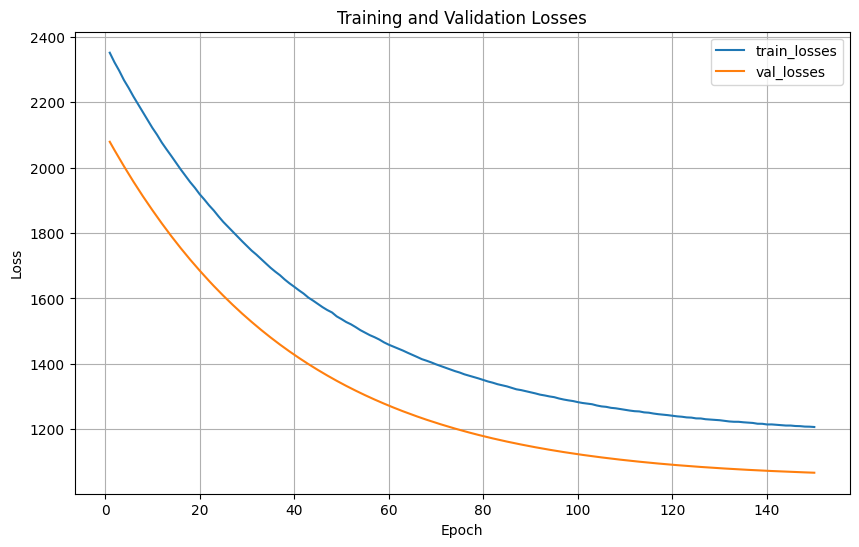

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([205])) that is different to the input size (torch.Size([205, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([165])) that is different to the input size (torch.Size([165, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(

Early stopping after 28 epochs as validation loss did not improve.
    Epoch  train_losses   val_losses
0       1   2235.982084  1872.405863
1       2   2008.418772  1685.161018
2       3   1830.334170  1539.171421
3       4   1690.472802  1427.213832
4       5   1579.865244  1340.812105
5       6   1492.654998  1272.031320
6       7   1424.132727  1219.040308
7       8   1371.680958  1178.558906
8       9   1328.359960  1147.549112
9      10   1296.732288  1123.683497
10     11   1270.577098  1105.465180
11     12   1249.005350  1091.471025
12     13   1233.752405  1080.940634
13     14   1220.384441  1073.147667
14     15   1210.092488  1067.259157
15     16   1204.185722  1063.064131
16     17   1196.526781  1059.930099
17     18   1192.928485  1057.679420
18     19   1187.964617  1056.119719
19     20   1185.107403  1055.099757
20     21   1182.303776  1054.475956
21     22   1180.852281  1054.128700
22     23   1179.922692  1053.971575
23     24   1178.934705  1053.977879
24     2

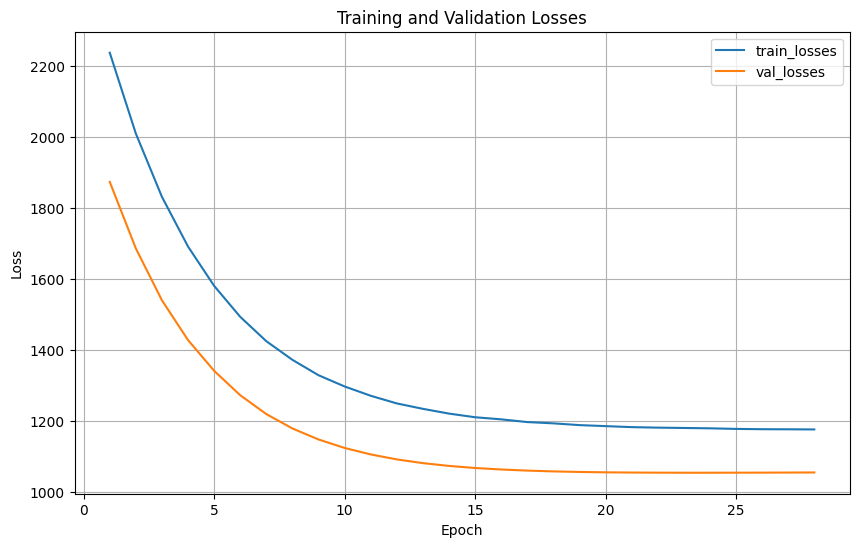

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([205])) that is different to the input size (torch.Size([205, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([165])) that is different to the input size (torch.Size([165, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(

Early stopping after 7 epochs as validation loss did not improve.
   Epoch  train_losses   val_losses
0      1   1631.253271  1120.625849
1      2   1213.841071  1054.891395
2      3   1177.354784  1055.130635
3      4   1174.366081  1057.192826
4      5   1174.366834  1057.500925
5      6   1173.922701  1058.206109
6      7   1173.655429  1057.657344


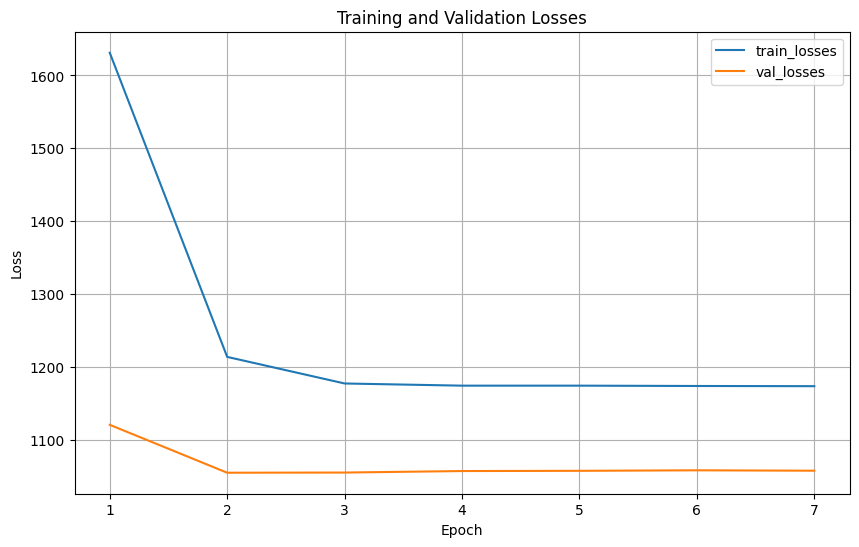

In [150]:
## TODO: Train models with early stopping with the different learning rates
# Train models with different learning rates and early stopping
lr_list = [0.0001, 0.001, 0.01]
num_epochs = 150
patience = 5

# train_losses_list =[]
# val_losses_list =[]


for lr in lr_list:
    # Initialize the model, optimizer, loss function, and data loaders
    model = LinearRegression()
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    # Run training with early stopping
    train_losses, val_losses = run_training_early_stopper(model, train_dataloader, val_dataloader, loss_function, optimizer, device, num_epochs, patience)
    

    plot_losses(train_losses, val_losses)

In [ ]:
## TODO: Visualize the results. What do you see and why?


So, after visualzing the graph, I saw that early stopping is trigeered even after 7 epochs for the learning rate 0.01, and 28 epochs for the learing rate 0.001. Thus, less the learning rate, more is the early stopping. Also, we can see that 28 epochs with learing rate 0.001 is the optimal solution for less training and validatio loss.

## Now lets try to explore the impact of the batch size

**Task:** Fix $num\_epochs = 150$ and $lr = 0.001$ and try to change the batch size using values $[2, 4, 32, 128, 1024]$ for the batch size.
* What impact the batch size have? Why?

Early stopping after 11 epochs as validation loss did not improve.
Early stopping after 11 epochs as validation loss did not improve.
Early stopping after 10 epochs as validation loss did not improve.
Early stopping after 51 epochs as validation loss did not improve.
Early stopping after 144 epochs as validation loss did not improve.


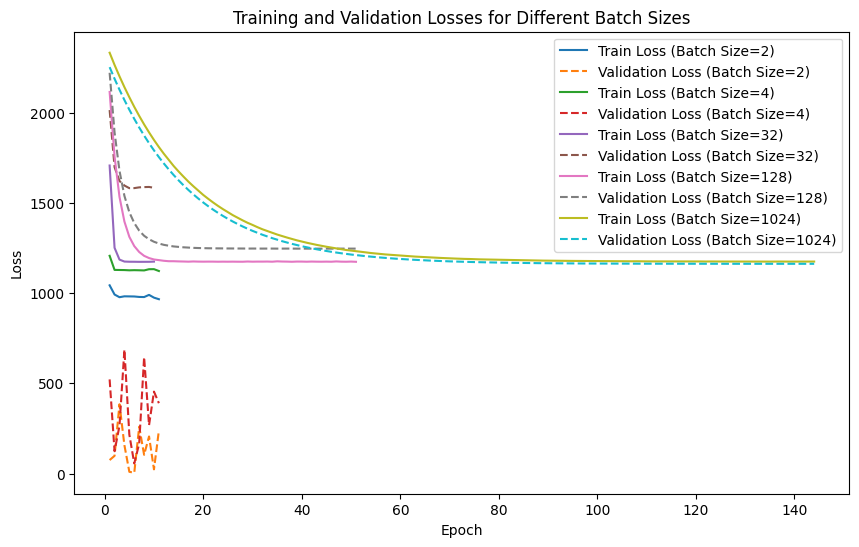

In [154]:
num_epochs = 150
lr = 0.001
## TODO: Train with different batch sizes

def plot_losses_batch(train_losses_list, val_losses_list, batch_sizes):
    plt.figure(figsize=(10, 6))
    for i, (train_losses, val_losses) in enumerate(zip(train_losses_list, val_losses_list)):
        sns.lineplot(x=range(1, len(train_losses) + 1), y=train_losses, label=f'Train Loss (Batch Size={batch_sizes[i]})')
        sns.lineplot(x=range(1, len(val_losses) + 1), y=val_losses, label=f'Validation Loss (Batch Size={batch_sizes[i]})', linestyle='dashed')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses for Different Batch Sizes')
    plt.legend()
    plt.show()

# Define the list of batch sizes to try
batch_sizes = [2, 4, 32, 128, 1024]

# Fix other parameters
patience = 5

# Initialize lists to store losses for each batch size
all_train_losses = []
all_val_losses = []

# Loop over each batch size
for batch_size in batch_sizes:
    # Initialize the data loaders with the current batch size
    train_dataloader = DataLoader(conductor_train, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(conductor_val, batch_size=batch_size)

    # Initialize the model, optimizer, and loss function
    model = LinearRegression()
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_function = nn.MSELoss()

    # Run training with early stopping
    train_losses, val_losses = run_training_early_stopper(model, train_dataloader, val_dataloader, loss_function, optimizer, device, num_epochs, patience)

    # Append the losses for the current batch size
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Plot the training and validation losses for all batch sizes
plot_losses_batch(all_train_losses, all_val_losses, batch_sizes)



In [ ]:
## TODO: Visualize the differences 

- So in the above figure, we can see the graph is instable and have high fluctuations in the trainig and validation loss function for the batch size 2. It is because the model is updating its parameter base on very small data i.e. after processing 2 samples from the training dataset. From this graph, it can be concluded that for $lr = 0.001$, we can get the early stopping after 15-25 epochs with a batch size of 128 for less training and validation losses. 

- Smaller batches results in more erratcti updates whereas large batch sizes tend to result in more stable updates and smoother training dynamics. 